In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

In [67]:
url="https://www.hubertiming.com/results/2014MLK" #open link
html = urlopen(url)

In [68]:
soup = BeautifulSoup(html)

In [69]:
data = []
allrows= soup.find_all("tr")
for row in allrows :
    row_list = row.find_all("td")
    dataRow= []
    for cell in row_list:
        dataRow.append(cell.text)
    data.append(dataRow)
  
data = data[6:] 

In [70]:
header_list = []
col_headers = soup.find_all('th')
for col in col_headers:
    header_list.append(col.text)
print(header_list)

['Place', 'Bib', 'Name', 'Gender', 'Age', 'City', 'State', 'Time', 'Pace', 'Gender Place', 'Age Group', 'Age Group Place']


In [71]:
df = pd.DataFrame(data)

In [72]:
df.columns = header_list
print(df.head())

  Place   Bib                Name Gender Age      City State      Time  \
0     6  1292       JOHN GRANHOLM      M  47  PORTLAND    OR  00:16:11   
1     7  1272       SCOTT GRAVATT      M  40  PORTLAND    OR  00:16:24   
2     8  1187  ANGELICA RODRIGUEZ      F  22  PORTLAND    OR  00:16:26   
3     9  1271      DALTON LINDSEY      M  18    KEIZER    OR  00:16:38   
4    10  1047          EMILY YORK      F  35  PORTLAND    OR  00:16:41   

       Pace Gender Place Age Group Age Group Place  
0  00:05:13     6 of 111   M 45-49          2 of 7  
1  00:05:17     7 of 111   M 40-44         1 of 14  
2  00:05:18     1 of 192   F 20-24          1 of 6  
3  00:05:21     8 of 111   M 15-19          2 of 5  
4  00:05:23     2 of 192   F 35-39         1 of 28  


In [73]:
df.shape

(301, 12)

In [74]:
df2 = df.dropna(how='any')
df.shape

(301, 12)

In [75]:
df2['Year'] = 2014

C:\Users\gladies\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
time_list = df2['Time'].tolist()

# Use a for loop to convert 'Chip Time' to minutes

time_mins = []
for i in time_list:
    h, m, s = i.split(':')
    math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    time_mins.append(math)
#print(time_mins)

In [77]:
df2['Runner_mins'] = time_mins
df2.head(5)

C:\Users\gladies\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Place,Bib,Name,Gender,Age,City,State,Time,Pace,Gender Place,Age Group,Age Group Place,Year,Runner_mins
0,6,1292,JOHN GRANHOLM,M,47,PORTLAND,OR,00:16:11,00:05:13,6 of 111,M 45-49,2 of 7,2014,16.183333
1,7,1272,SCOTT GRAVATT,M,40,PORTLAND,OR,00:16:24,00:05:17,7 of 111,M 40-44,1 of 14,2014,16.400000
2,8,1187,ANGELICA RODRIGUEZ,F,22,PORTLAND,OR,00:16:26,00:05:18,1 of 192,F 20-24,1 of 6,2014,16.433333
3,9,1271,DALTON LINDSEY,M,18,KEIZER,OR,00:16:38,00:05:21,8 of 111,M 15-19,2 of 5,2014,16.633333
4,10,1047,EMILY YORK,F,35,PORTLAND,OR,00:16:41,00:05:23,2 of 192,F 35-39,1 of 28,2014,16.683333


Text(0.5, 1.0, 'Comparsion of average minutes run by male and female')

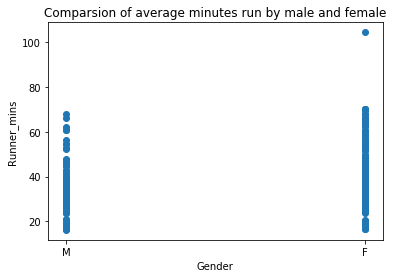

In [78]:
plt.scatter(df2['Gender'], df2['Runner_mins'])
plt.xlabel('Gender')
plt.ylabel('Runner_mins')
plt.title("Comparsion of average minutes run by male and female") 

In [79]:
df2.describe(include=[np.number])

,Year,Runner_mins
count,298.0,298.000000
mean,2014.0,38.643177
std,0.0,13.793660
min,2014.0,16.183333
25%,2014.0,28.554167
50%,2014.0,36.283333
75%,2014.0,46.579167
max,2014.0,104.350000


Text(0, 0.5, 'Run time')

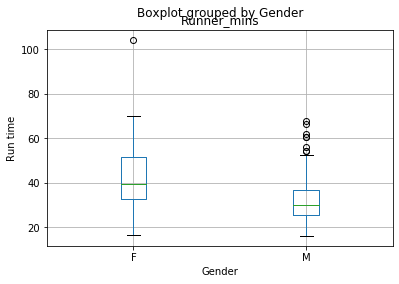

In [80]:
df2.boxplot(column='Runner_mins', by = 'Gender')
plt.ylabel('Run time')

C:\Users\gladies\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\gladies\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


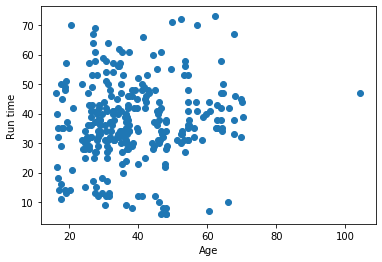

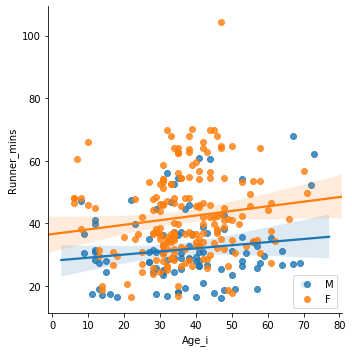

In [81]:
import seaborn as sns, numpy as np
df2['Age_i'] = round(pd.to_numeric(df2['Age'], errors='coerce'))
df2.dropna(how ='any', inplace = True)
df = plt.scatter(df2['Runner_mins'], df2['Age_i'])
df = plt.ylabel('Run time')
df= plt.xlabel('Age')
df = plt.show()

sns.lmplot( x='Age_i', y='Runner_mins', data=df2, fit_reg=True, hue='Gender', legend=False)
plt.legend(loc='lower right')


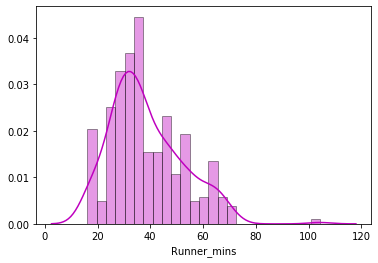

In [82]:
import seaborn as sns, numpy as np
x = df2['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

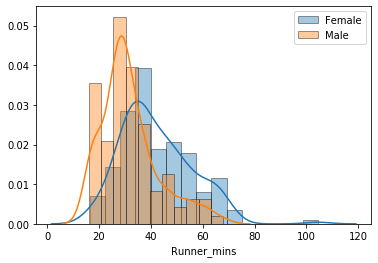

In [83]:
f_fuko = df2.loc[df2['Gender']=='F']['Runner_mins']
m_fuko = df2.loc[df2['Gender']=='M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

In [84]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

In [85]:
g_stats = df2.groupby("Gender", as_index=True).describe()
print(g_stats)

         Year                                                       \
        count    mean  std     min     25%     50%     75%     max   
Gender                                                               
F       191.0  2014.0  0.0  2014.0  2014.0  2014.0  2014.0  2014.0   
M       102.0  2014.0  0.0  2014.0  2014.0  2014.0  2014.0  2014.0   

       Runner_mins             ...                         Age_i             \
             count       mean  ...        75%         max  count       mean   
Gender                         ...                                            
F            191.0  42.067714  ...  50.483333  104.350000  191.0  36.895288   
M            102.0  31.807026  ...  36.500000   67.816667  102.0  37.470588   

                                                 
              std  min   25%   50%    75%   max  
Gender                                           
F       12.356099  6.0  31.0  36.0  44.50  71.0  
M       15.742800  8.0  29.0  36.0  47.75  73.0  

[2

Text(0, 0.5, 'Run time')

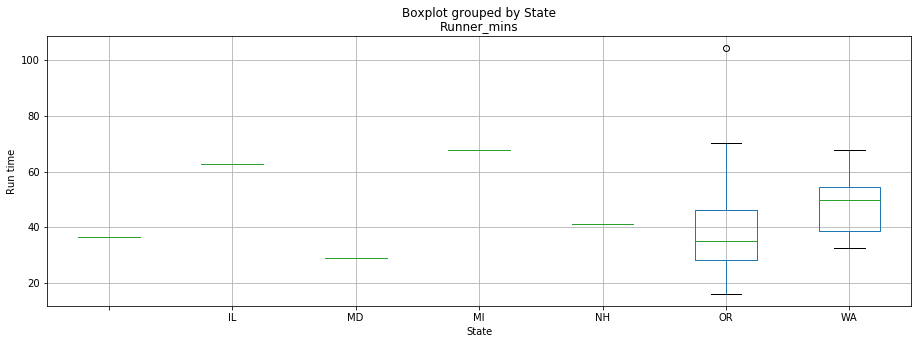

In [86]:
df2.boxplot(column='Runner_mins', by = 'State')
plt.ylabel('Run time')

Text(0, 0.5, 'Run time')

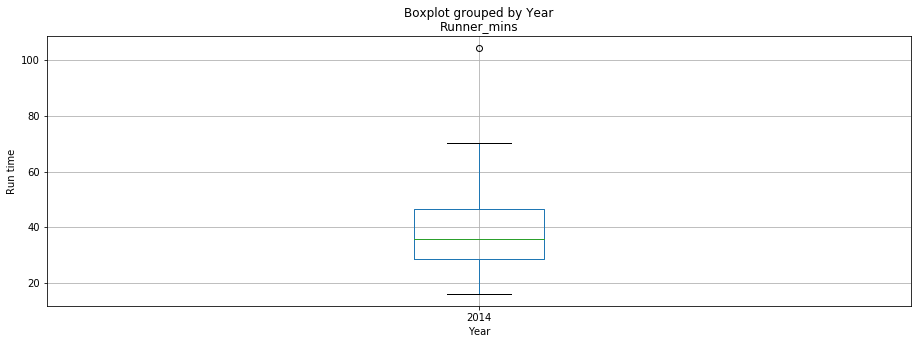

In [87]:
df2.boxplot(column='Runner_mins', by = 'Year')
plt.ylabel('Run time')

In [88]:
df2.to_csv('final2014.csv')